# CSE602: Machine Learning - I

# PROJECT ML-1

### Submitted by:
#### Name    : Muhammad Amin Ghias - 25366

#### Name    : UZAIR ZAHIDI - 25374

Date : 8th May 2022

# Targetted Marketting (Predicting classess)

### The dataset created now has 4 classess , we will tarin on this dataset to determine customers lie in which class

# Imorting Libraries

In [1]:
import pandas as pd

import pandas as pd   
import matplotlib.pyplot as plt
import time

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from matplotlib import pyplot

from numpy import mean
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from mixed_naive_bayes import MixedNB
import numpy as np


import pandas as pd   
import matplotlib.pyplot as plt
import time

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from matplotlib import pyplot

from numpy import mean
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import LassoCV
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean

import pickle

from sklearn.ensemble import HistGradientBoostingClassifier


from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.ensemble import VotingClassifier

cv = KFold(n_splits=10, random_state=1, shuffle=True)
reg = LinearRegression()


# Importing CSV & Data Exploration

In [2]:
df = pd.read_csv('df_classes.csv')

df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,class
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause


In [3]:
df.shape

(13979592, 17)

In [4]:
df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
count,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07
mean,1.962030e+01,1.006998e+01,8.446582e+00,4.178923e+00,1.033884e+01,4.028513e+00,-4.155356e+00,5.101765e+00,3.933581e+00,1.602764e+01,5.333396e+00,-1.709672e-01,8.500001e-01,2.916680e-03,4.699200e-02,3.063122e-02
std,5.377464e+00,1.047557e-01,2.993161e-01,1.336645e+00,3.433081e-01,4.310974e-01,4.577914e+00,1.205248e+00,5.665958e-02,7.018975e+00,1.682288e-01,2.283277e-02,3.570713e-01,5.392748e-02,2.116217e-01,1.723164e-01
min,1.261636e+01,1.005965e+01,8.214383e+00,-8.398387e+00,1.028053e+01,-9.011892e+00,-3.142978e+01,4.833815e+00,3.635107e+00,1.319006e+01,5.300375e+00,-1.383941e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.261636e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-6.699321e+00,4.833815e+00,3.910792e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.192341e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-2.411115e+00,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.443646e+01,1.005965e+01,8.723335e+00,4.679882e+00,1.028053e+01,4.115453e+00,2.944427e-01,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.674526e+01,1.634419e+01,9.051962e+00,4.679882e+00,2.112351e+01,4.115453e+00,2.944427e-01,1.199840e+01,3.971858e+00,7.529502e+01,6.473917e+00,-1.686792e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 17 columns):
 #   Column      Dtype  
---  ------      -----  
 0   f0          float64
 1   f1          float64
 2   f2          float64
 3   f3          float64
 4   f4          float64
 5   f5          float64
 6   f6          float64
 7   f7          float64
 8   f8          float64
 9   f9          float64
 10  f10         float64
 11  f11         float64
 12  treatment   int64  
 13  conversion  int64  
 14  visit       int64  
 15  exposure    int64  
 16  class       object 
dtypes: float64(12), int64(4), object(1)
memory usage: 1.8+ GB


In [6]:
df.dtypes

f0            float64
f1            float64
f2            float64
f3            float64
f4            float64
f5            float64
f6            float64
f7            float64
f8            float64
f9            float64
f10           float64
f11           float64
treatment       int64
conversion      int64
visit           int64
exposure        int64
class          object
dtype: object

In [7]:
df.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'treatment', 'conversion', 'visit', 'exposure', 'class'],
      dtype='object')

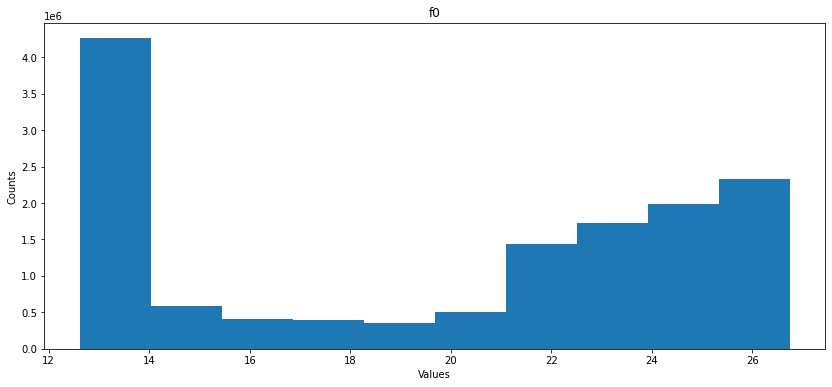

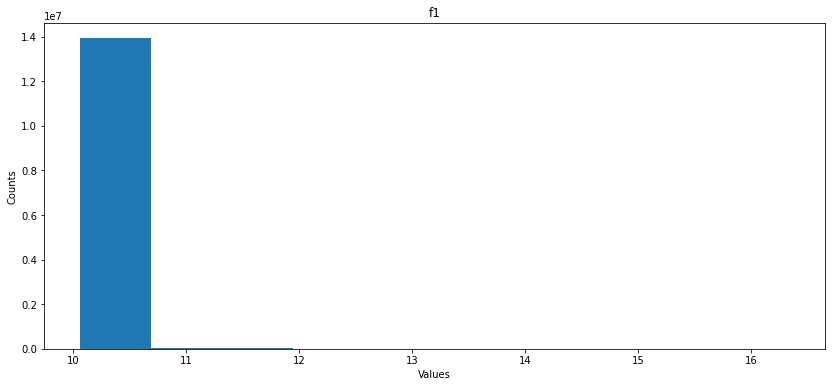

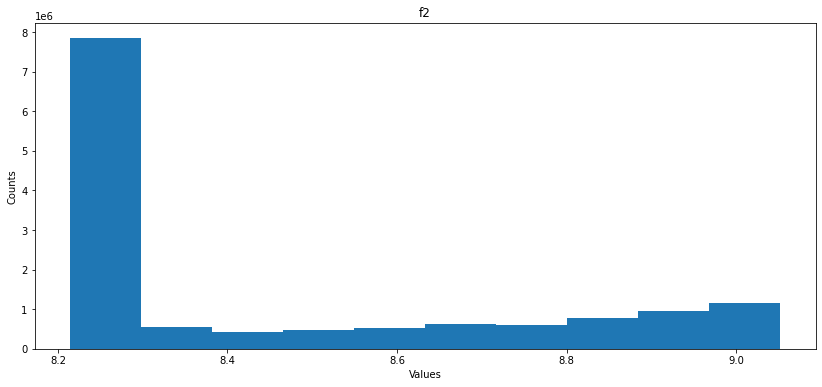

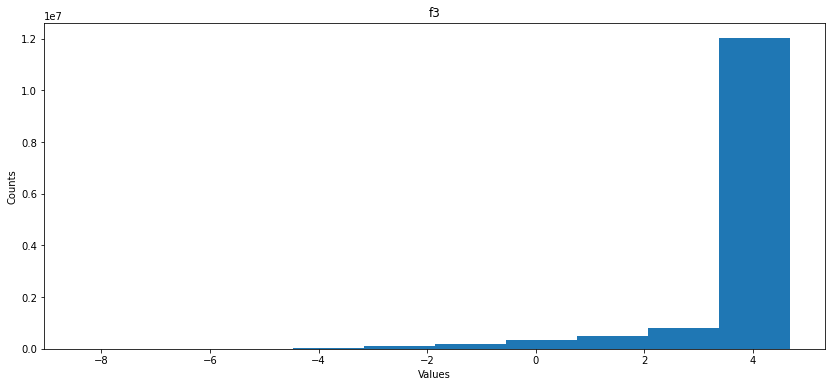

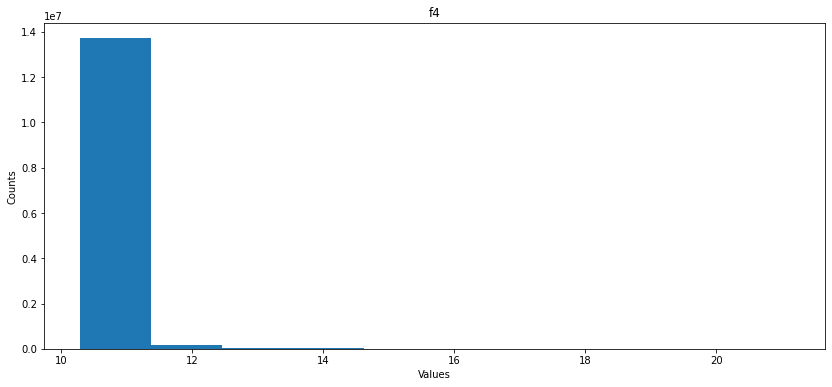

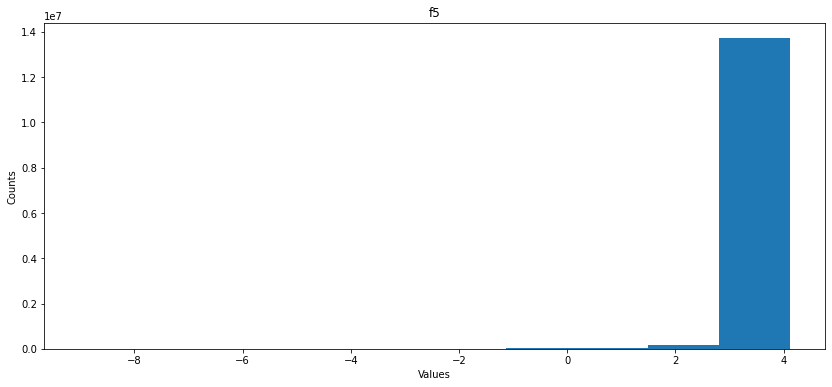

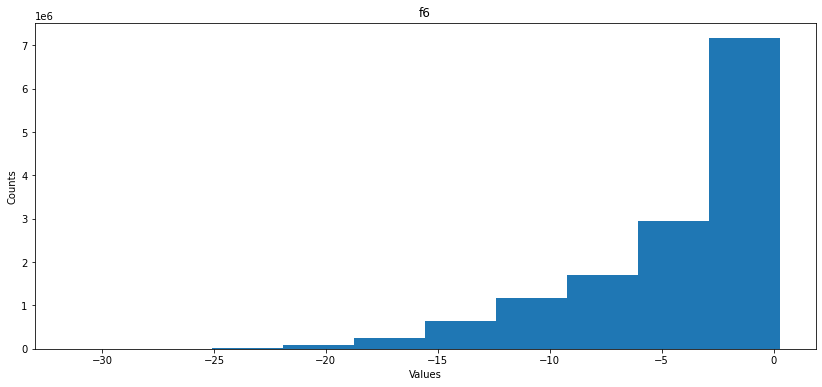

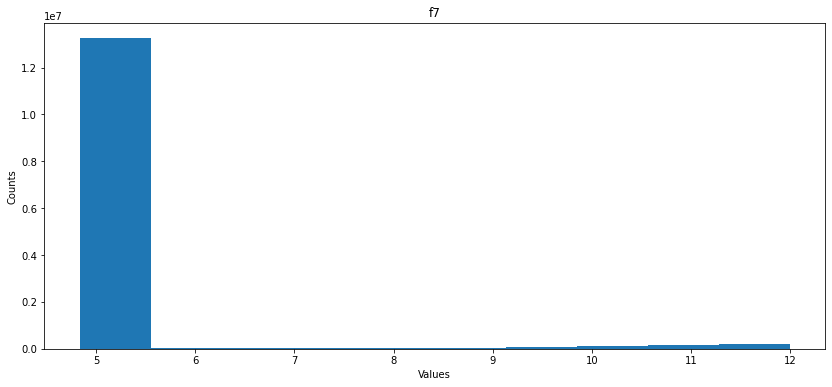

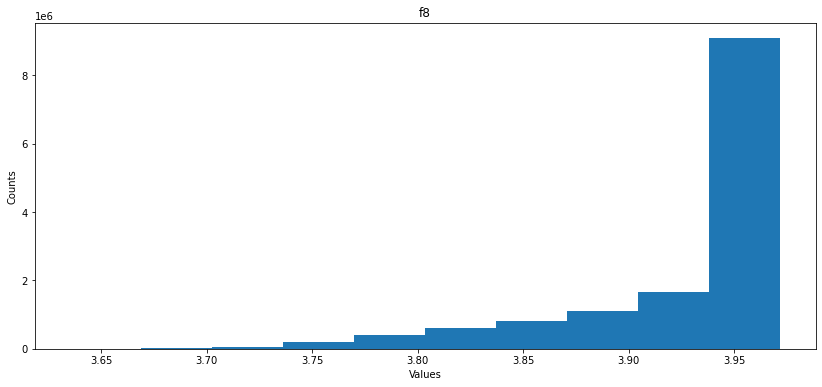

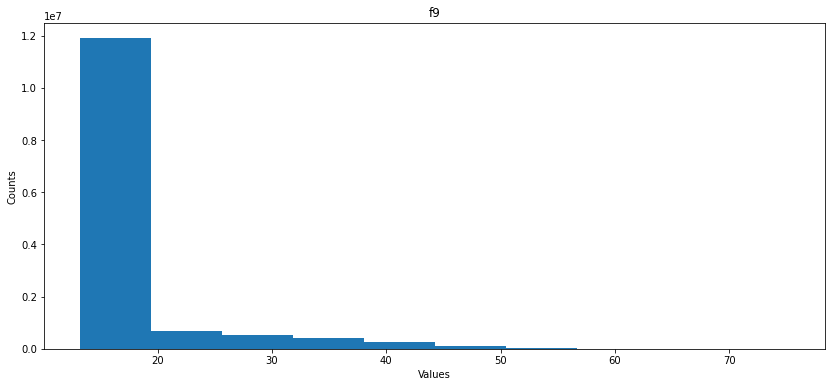

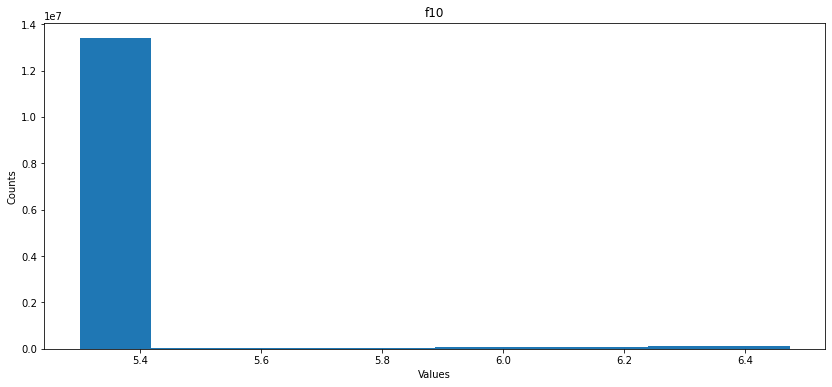

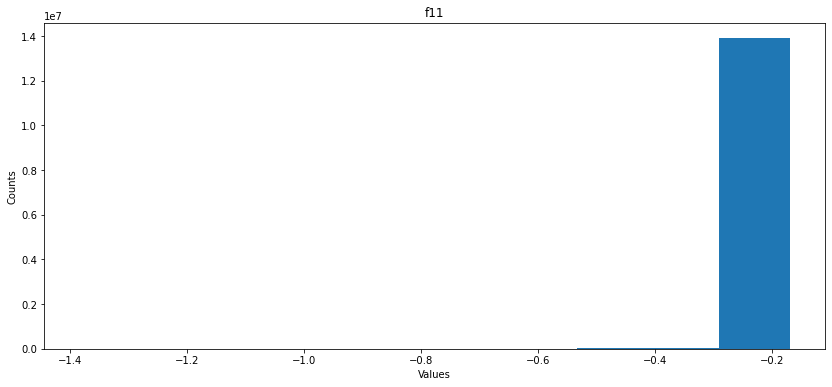

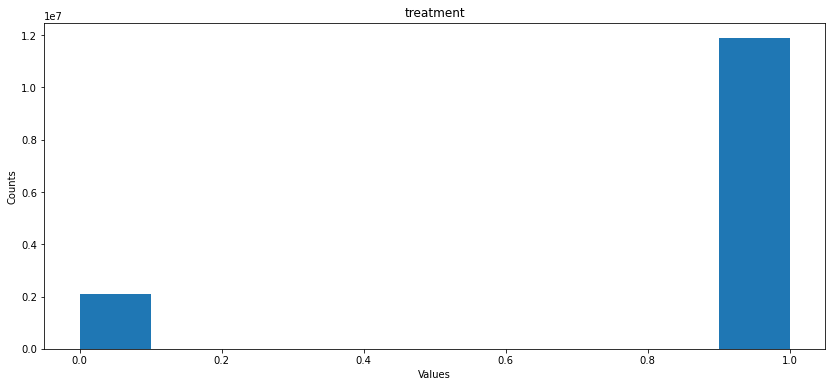

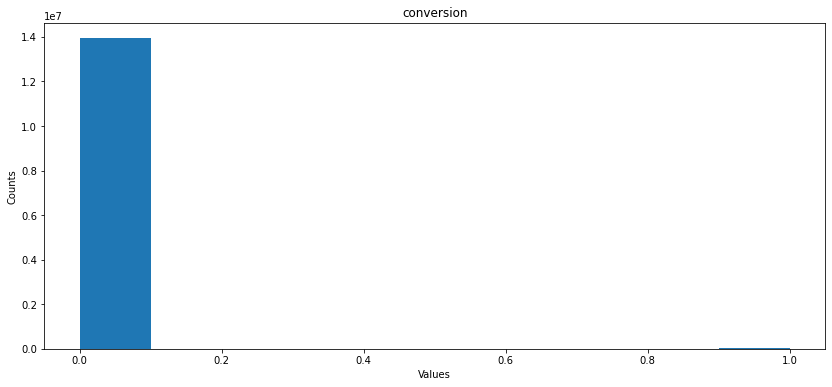

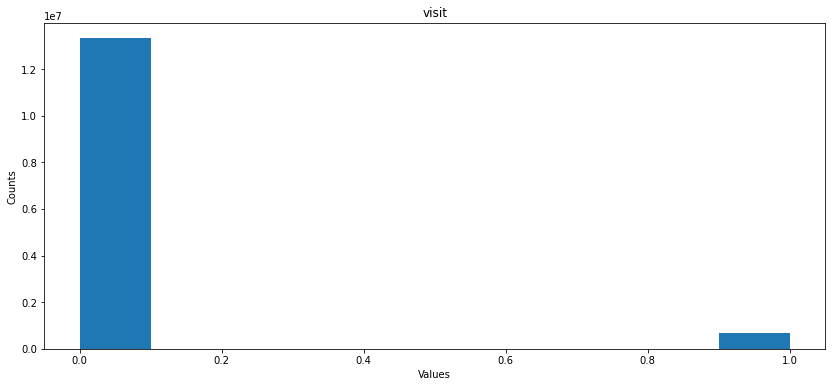

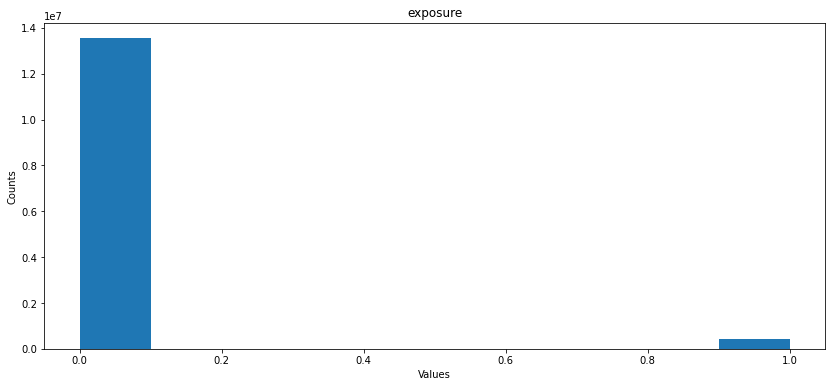

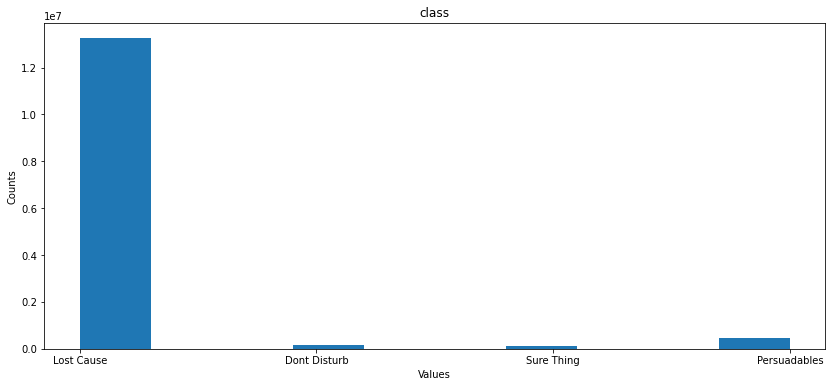

In [8]:
for i, col in enumerate(df.columns):
    # print(i)
    # print(col)
    # plt.figure(figsize=(18, 8))
    plt.figure(i,figsize=(14, 6))
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel("Values")
    plt.ylabel("Counts")

In [9]:
for i in df.columns:
    # print(i)
    a=df[i].isnull().sum()
    print( i, ' Na values : ' ,a )

f0  Na values :  0
f1  Na values :  0
f2  Na values :  0
f3  Na values :  0
f4  Na values :  0
f5  Na values :  0
f6  Na values :  0
f7  Na values :  0
f8  Na values :  0
f9  Na values :  0
f10  Na values :  0
f11  Na values :  0
treatment  Na values :  0
conversion  Na values :  0
visit  Na values :  0
exposure  Na values :  0
class  Na values :  0


## Data Exploration

In [10]:
dfz=df.copy()

conditions = [
    (dfz['treatment'] == 1) & (dfz['conversion'] ==1) & (dfz['exposure'] ==1) & (dfz['visit'] ==0),
    (dfz['treatment'] == 1) & (dfz['conversion'] ==1) & (dfz['exposure'] ==0) & (dfz['visit'] ==0),
    (dfz['treatment'] == 1) & (dfz['conversion'] ==0) & (dfz['exposure'] ==1) & (dfz['visit'] ==0),
    (dfz['treatment'] == 1) & (dfz['conversion'] ==0) & (dfz['exposure'] ==0) & (dfz['visit'] ==0),
    (dfz['treatment'] == 0) & (dfz['conversion'] ==1) & (dfz['exposure'] ==1) & (dfz['visit'] ==0),
    (dfz['treatment'] == 0) & (dfz['conversion'] ==1) & (dfz['exposure'] ==0) & (dfz['visit'] ==0),
    (dfz['treatment'] == 0) & (dfz['conversion'] ==0) & (dfz['exposure'] ==1) & (dfz['visit'] ==0),
    (dfz['treatment'] == 0) & (dfz['conversion'] ==0) & (dfz['exposure'] ==0) & (dfz['visit'] ==0),
    (dfz['treatment'] == 1) & (dfz['conversion'] ==1) & (dfz['exposure'] ==1) & (dfz['visit'] ==1),
    (dfz['treatment'] == 1) & (dfz['conversion'] ==1) & (dfz['exposure'] ==0) & (dfz['visit'] ==1),
    (dfz['treatment'] == 1) & (dfz['conversion'] ==0) & (dfz['exposure'] ==1) & (dfz['visit'] ==1),
    (dfz['treatment'] == 1) & (dfz['conversion'] ==0) & (dfz['exposure'] ==0) & (dfz['visit'] ==1),
    (dfz['treatment'] == 0) & (dfz['conversion'] ==1) & (dfz['exposure'] ==1) & (dfz['visit'] ==1),
    (dfz['treatment'] == 0) & (dfz['conversion'] ==1) & (dfz['exposure'] ==0) & (dfz['visit'] ==1),
    (dfz['treatment'] == 0) & (dfz['conversion'] ==0) & (dfz['exposure'] ==1) & (dfz['visit'] ==1),
    (dfz['treatment'] == 0) & (dfz['conversion'] ==0) & (dfz['exposure'] ==0) & (dfz['visit'] ==1)
    ]

# create a list of the values we want to assign for each condition
values = ['tce', 'tc', 'te', 't', 'ce', 'c', 'e', 'non','tcev', 'tcv', 'tev', 'tv', 'cev', 'cv', 'ev', 'v']

dfz['tier'] = np.select(conditions, values)

# display updated DataFrame
dfz.head()

pd.value_counts(dfz.tier)

NumExpr defaulting to 8 threads.


t       11055129
non      2016832
tv        385634
te        250702
tev       154479
v          76042
tcev       23031
tcv        13680
cv          4063
Name: tier, dtype: int64

In [11]:
dfz.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,class,tier
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause,t
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause,t
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause,t
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause,t
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause,t


In [12]:
dfz["tier"].unique()

array(['t', 'te', 'non', 'v', 'cv', 'tcev', 'tv', 'tcv', 'tev'],
      dtype=object)

In [13]:
tabel=pd.crosstab(df['treatment'], df['visit'], margins = True)

In [14]:
tabel

visit,0,1,All
treatment,,,
0,2016832,80105,2096937
1,11305831,576824,11882655
All,13322663,656929,13979592


In [15]:
tabel2=pd.crosstab(df['treatment'],  df['conversion'], margins = True)

In [16]:
tabel2

conversion,0,1,All
treatment,,,
0,2092874,4063,2096937
1,11845944,36711,11882655
All,13938818,40774,13979592


In [17]:
tabel3=pd.crosstab(df['treatment'],  df['exposure'], margins = True)
tabel3

exposure,0,1,All
treatment,,,
0,2096937,0,2096937
1,11454443,428212,11882655
All,13551380,428212,13979592


In [18]:
tabel4=pd.crosstab(df['visit'],  df['conversion'], margins = True)
tabel4

conversion,0,1,All
visit,,,
0,13322663,0,13322663
1,616155,40774,656929
All,13938818,40774,13979592


# Correlation Matrix

In [19]:
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,class
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause


In [20]:
df1hc = pd.get_dummies(df)
print(df1hc.shape)
df1hc.head()

(13979592, 20)


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,class_Dont Disturb,class_Lost Cause,class_Persuadables,class_Sure Thing
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0,1,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0,1,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0,1,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0,1,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0,1,0,0


In [21]:
cor=df1hc.corr()

In [22]:
cor

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,class_Dont Disturb,class_Lost Cause,class_Persuadables,class_Sure Thing
f0,1.000000,-0.086022,-0.514555,0.280570,-0.093442,0.053413,-0.270590,-0.000088,0.404888,-0.291799,-0.091798,0.078254,-0.002454,-0.037973,-0.134034,-0.123310,-0.061471,0.141430,-0.107841,-0.063366
f1,-0.086022,1.000000,-0.012844,-0.329413,0.149221,-0.574309,-0.192257,0.151326,-0.143599,0.174166,0.069124,-0.150227,0.008185,0.083103,0.112029,0.188304,0.043129,-0.118771,0.080378,0.080228
f2,-0.514555,-0.012844,1.000000,0.006777,0.024577,-0.022430,0.183739,0.035471,-0.372912,-0.051673,0.088896,0.030912,-0.002233,-0.014175,-0.030331,0.004787,-0.036495,0.041908,0.001775,-0.059592
f3,0.280570,-0.329413,0.006777,1.000000,-0.199666,0.334220,0.549706,-0.204964,0.282054,-0.303108,-0.135873,0.171959,-0.016939,-0.104222,-0.207821,-0.371455,-0.070926,0.216322,-0.169328,-0.113338
f4,-0.093442,0.149221,0.024577,-0.199666,1.000000,-0.197011,-0.159261,0.112939,-0.409904,0.364326,0.658277,-0.677701,0.002829,0.298634,0.267452,0.156960,0.193590,-0.311336,0.104539,0.314642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
exposure,-0.123310,0.188304,0.004787,-0.371455,0.156960,-0.228143,-0.268516,0.149811,-0.203478,0.206872,0.101505,-0.131551,0.074675,0.167675,0.308737,1.000000,0.000220,-0.299007,0.299782,0.142307
class_Dont Disturb,-0.061471,0.043129,-0.036495,-0.070926,0.193590,-0.052331,-0.043797,0.033473,-0.266630,0.310592,0.132448,-0.164988,-0.112101,0.046704,0.239819,0.000220,1.000000,-0.444550,-0.018778,-0.010328
class_Lost Cause,0.141430,-0.118771,0.041908,0.216322,-0.311336,0.146007,0.143011,-0.096188,0.506398,-0.557721,-0.233344,0.255620,-0.026078,-0.230973,-0.948300,-0.299007,-0.444550,1.000000,-0.770340,-0.423721
class_Persuadables,-0.107841,0.080378,0.001775,-0.169328,0.104539,-0.103379,-0.112000,0.072828,-0.307420,0.303588,0.120789,-0.063847,0.075777,0.148493,0.812337,0.299782,-0.018778,-0.770340,1.000000,-0.017898


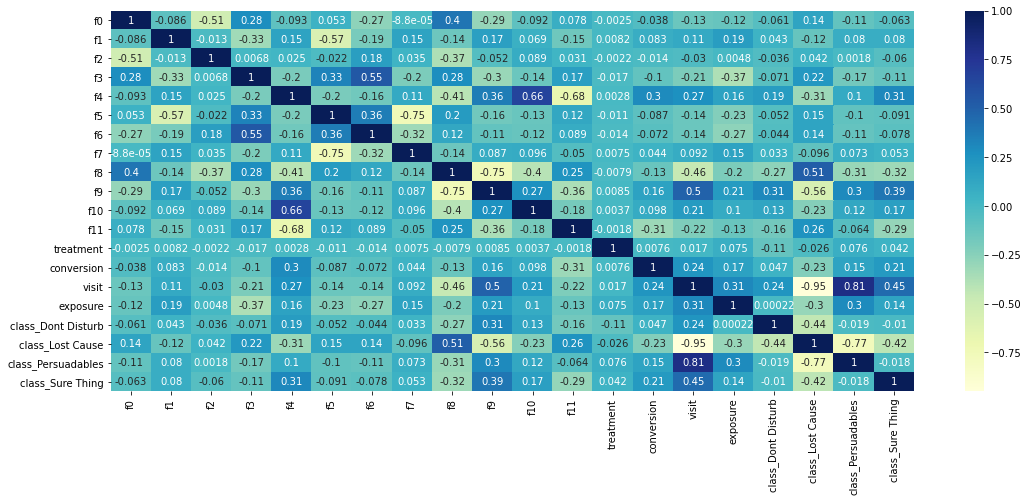

In [23]:
# plotting correlation heatmap
plt.figure(figsize=(18, 7))
dataplot = sns.heatmap(cor, cmap="YlGnBu", annot=True)
  
# displaying heatmap
# plt.figure(figsize=(18, 18))
# plt.figure()
plt.show()

# Filtering

a) Remoeving features on self-corelation
b) Removing features on correlation with target variable
c) Removing features on Self variance

In [24]:
#  Removing of self correlation

# This  function will find correlation feateures with each other and tell feaure with are highly correlataed nearly same which can be removed

def self_corr(cormatrix,low_range,high_range):

    cor=cormatrix


    fcr_df=pd.DataFrame(columns= ['feature 1', 'feature 2', 'correlation values'])
    l=len(cor)
    fcor_rem=[]
    l
    for j in range(l):
        for k in range(l):
            fcor=cor.iloc[j-1,k-1]

            if fcor>=low_range and fcor <high_range:

                
                f2=cor.index[j-1]
                f3=cor.columns[k-1]

                
                fcor_rem.append([f2, f3, fcor])
                fcr_df=fcr_df.append({'feature 1': f2, 'feature 2' : f3, 'correlation values': fcor}, ignore_index=True)
                


    fcr12=fcr_df.copy()

    for i in range(len(fcr12)):
        for j in range(len(fcr12)):
            try:

                if fcr12.iloc[j,0]==fcr12.iloc[i,1]:
                    fcr12=fcr12.drop(j)
            except:
                    

             fcr12 =fcr12.reset_index(drop=True)

    print(fcr_df.head())
    return(fcr12['feature 1'])
        



In [25]:
rem_selfcor =self_corr(cor,0.8,1)

            feature 1           feature 2  correlation values
0               visit  class_Persuadables            0.812337
1  class_Persuadables               visit            0.812337


In [26]:
#  Removing of features on correlation with target variable

# if feature has very low correlation with target variable it can be neglected


def target_cor(cor_matrix,target_feature,lower_limit):

    cor= cor_matrix


    cor_target = abs(cor[target_feature])

    #Selecting highly correlated features
    relevant_features = cor_target[cor_target<lower_limit]
    print(relevant_features)
    return(relevant_features.index)

In [27]:
rem_cor_d=target_cor(cor,'class_Dont Disturb',0.1)

f0                    0.061471
f1                    0.043129
f2                    0.036495
f3                    0.070926
f5                    0.052331
f6                    0.043797
f7                    0.033473
conversion            0.046704
exposure              0.000220
class_Persuadables    0.018778
class_Sure Thing      0.010328
Name: class_Dont Disturb, dtype: float64


In [28]:
rem_cor_s=target_cor(cor,'class_Sure Thing',0.1)

f0                    0.063366
f1                    0.080228
f2                    0.059592
f5                    0.091223
f6                    0.078070
f7                    0.052749
treatment             0.041681
class_Dont Disturb    0.010328
class_Persuadables    0.017898
Name: class_Sure Thing, dtype: float64


In [29]:
rem_cor_l=target_cor(cor,'class_Lost Cause',0.1)

f2           0.041908
f7           0.096188
treatment    0.026078
Name: class_Lost Cause, dtype: float64


In [30]:
rem_cor_p=target_cor(cor,'class_Persuadables',0.1)

f1                    0.080378
f2                    0.001775
f7                    0.072828
f11                   0.063847
treatment             0.075777
class_Dont Disturb    0.018778
class_Sure Thing      0.017898
Name: class_Persuadables, dtype: float64


In [31]:
## Removing features with low self variance

## Features whcih remain constant can have no effect on predicting targert feature and can be removed

def self_var(dataset,limit):

    var=dataset.var()
    var_rem= var[var<limit]
    print(var_rem)
    return(var_rem.index)

    

In [32]:
rem_var=self_var(df1hc,0.1)

f1                    0.010974
f2                    0.089590
f8                    0.003210
f10                   0.028301
f11                   0.000521
conversion            0.002908
visit                 0.044784
exposure              0.029693
class_Dont Disturb    0.010605
class_Lost Cause      0.049280
class_Persuadables    0.030520
class_Sure Thing      0.009654
dtype: float64


In [33]:
rem_var

Index(['f1', 'f2', 'f8', 'f10', 'f11', 'conversion', 'visit', 'exposure',
       'class_Dont Disturb', 'class_Lost Cause', 'class_Persuadables',
       'class_Sure Thing'],
      dtype='object')

## Removing features

In [34]:
def remove_features(dataset,rem_feature):

    for i in rem_feature:
        try:
            dataset=dataset.drop(columns= i)
            dataset=dataset.reset_index(drop=True)

            print(dataset.shape)

        except:
            print('Missing')

    return(dataset)

In [35]:
# rem_cor

In [36]:
# Xr=df.copy()
# Xr=remove_features(Xr,rem_var)

In [37]:
# Xr.shape

# Making X and y datasets

### Creating X and y for treatment=0

In [38]:
dfX=df.copy()
# dfX=dfX.drop(columns=['visit','treatment','conversion','exposure','class'])
dfX=dfX.drop(columns=['visit','treatment','conversion','class'])
print(dfX.shape)
dfX.head()
X=dfX
X.head()

(13979592, 13)


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,0


In [39]:
y=df['class']
y.head()

0    Lost Cause
1    Lost Cause
2    Lost Cause
3    Lost Cause
4    Lost Cause
Name: class, dtype: object

# Making a small dataframe for chosing best model

In [40]:
dfp=df.sample(frac =.1)
print(dfp.shape)

pd.value_counts(dfp['class'])

(1397959, 17)


Lost Cause      1325112
Persuadables      44070
Dont Disturb      15069
Sure Thing        13708
Name: class, dtype: int64

In [41]:
dfXp=dfp.copy()
# dfXp=dfXp.drop(columns=['visit','treatment','conversion','expposure','class'])
dfXp=dfXp.drop(columns=['visit','treatment','conversion','class'])
print(dfXp.shape)
dfXp.head()
Xp=dfXp
Xp.head()

(1397959, 13)


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,exposure
13199048,23.372081,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,0
1502385,12.616365,10.059654,8.701250,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,0
2178202,24.309080,10.059654,8.214383,4.679882,10.280525,4.115453,-9.238756,4.833815,3.971858,13.190056,5.300375,-0.168679,0
6222580,12.616365,10.059654,8.927619,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,0
5142687,12.616365,10.059654,9.043596,4.679882,10.280525,4.115453,0.294443,4.833815,3.943716,13.190056,5.300375,-0.168679,0


In [42]:
yp=dfp['class']
yp.shape

(1397959,)

# Finding best model on reduced dataset

In [43]:
trainX, testX, trainy, testy = train_test_split(Xp, yp, test_size=0.3, random_state=2)

In [44]:
trainX, testX, trainy, testy = train_test_split(Xp, yp, test_size=0.3, random_state=2)

def fit_model(model, model_name):
    model.fit(trainX,trainy)
    md_probs = model.predict_proba(testX)
    md_auc = roc_auc_score(testy, md_probs, multi_class='ovr')
    pos_label='your_label'
    print(model_name, " : ", md_auc)
   
lr = LogisticRegression()
fit_model(lr, "Logistic")

dt = DecisionTreeClassifier(max_depth=5)  
fit_model(dt, "Decision Tree") 

rf = RandomForestClassifier(max_depth=5,n_estimators=50, verbose=2)
fit_model(rf, "Random Forest")

gb = GradientBoostingClassifier(max_depth=2,n_estimators=50, verbose=2)
fit_model(gb, "Graident Boosting")

histg=HistGradientBoostingClassifier(max_depth=2, max_iter=50, verbose=10)
fit_model(histg, "Hist-Gradient Boosting")

nb_g = GaussianNB()
fit_model(nb_g, "Naive Bayes Gaussian")

kn = KNeighborsClassifier(n_neighbors=5)
fit_model(kn, "k-NN")

pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])
fit_model(pipe_kn, "Scaled k-NN")



Logistic  :  0.9421809450740963
Decision Tree  :  0.9567119916019335


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   56.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.1s finished


Random Forest  :  0.9626564673164548
      Iter       Train Loss   Remaining Time 
         1           0.1867            9.20m
         2           0.1755            9.06m
         3           0.1676            8.82m
         4           0.1611            8.64m
         5           0.1562            8.46m
         6           0.1520            8.24m
         7           0.1484            8.07m
         8           0.1455            7.92m
         9           0.1431            7.72m
        10           0.1408            7.53m
        11           0.1390            7.35m
        12           0.1374            7.16m
        13           0.1359            6.97m
        14           0.1348            6.78m
        15           0.1337            6.59m
        16           0.1328            6.40m
        17           0.1320            6.15m
        18           0.1315            5.76m
        19           0.1308            5.40m
        20           0.1303            5.07m
        21       

Logistic  :  0.9421809450740963

Decision Tree  :  0.9567119916019335

Random Forest  :  0.9626564673164548

Graident Boosting  :  0.9633181808365909

Hist-Gradient Boosting  :  0.9651601462857793

Naive Bayes Gaussian  :  0.9339242229009771

k-NN  :  0.8172690444914528

Scaled k-NN  :  0.8600238102551588

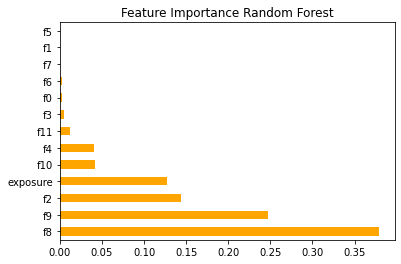

In [45]:
regRF = RandomForestClassifier(max_depth=5, max_features=4, min_samples_split=8,
                      n_estimators=50)#, random_state=0)
regRF.fit(trainX, trainy)
importance_rf = pd.Series(regRF.feature_importances_, index=trainX.columns)
importance_rf_sorted = importance_rf.sort_values()
importance_rf_sorted.nlargest(20).plot(kind='barh', color='orange')
plt.title("Feature Importance Random Forest")
plt.show()

# Hper Parameter Tuning

### GridSearchCv

In [46]:
### BEGIN SOLUTION
from sklearn.model_selection import GridSearchCV

# The parameters to be fit
param_grid = {'max_iter': [50, 100, 300, 500, 800, 1000, 1500],
              'max_depth': [2,5,7]}

# The grid search object

grid_search = GridSearchCV(HistGradientBoostingClassifier(random_state=42,verbose=3), 
                      param_grid=param_grid, 
                      n_jobs=-1,verbose=10)

# Do the grid search

grid_search.fit(trainX, trainy)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Binning 0.092 GB of training data: 0.272 s
Binning 0.010 GB of validation data: 0.007 s
Fitting gradient boosted rounds:
[1/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.16312, val loss: 0.16379, in 0.235s
[2/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.15181, val loss: 0.15261, in 0.242s
[3/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.14441, val loss: 0.14538, in 0.246s
[4/300] 4 trees, 115 leaves (28 on avg), max depth = 5, train loss: 0.13883, val loss: 0.13993, in 0.252s
[5/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.13459, val loss: 0.13583, in 0.247s
[6/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.13129, val loss: 0.13262, in 0.249s
[7/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.12867, val loss: 0.13010, in 0.256s
[8/300] 4 trees, 122 leaves (30 on avg), max depth = 5, train loss: 0.12655

In [48]:
histg=HistGradientBoostingClassifier(max_depth=5, max_iter=300, verbose=10)
histg.fit(trainX,trainy)
md_probs = histg.predict_proba(testX)
md_auc = roc_auc_score(testy, md_probs, multi_class='ovr')
print('Hist-Gradient boosting', " : ", md_auc) 

Binning 0.092 GB of training data: 0.287 s
Binning 0.010 GB of validation data: 0.012 s
Fitting gradient boosted rounds:
[1/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.16309, val loss: 0.16332, in 0.262s
[2/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.15198, val loss: 0.15246, in 0.274s
[3/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.14458, val loss: 0.14527, in 0.286s
[4/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.13895, val loss: 0.13983, in 0.278s
[5/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.13468, val loss: 0.13571, in 0.277s
[6/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.13134, val loss: 0.13249, in 0.301s
[7/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.12869, val loss: 0.12997, in 0.275s
[8/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.12662, val loss: 0.12798, in 0.297s
[9/300] 4 trees, 124 leaves (31

# Voting Classifer

In [49]:
r1 = GradientBoostingClassifier(max_depth=2,n_estimators=50, verbose=2)
r2 = RandomForestClassifier(max_depth=5,n_estimators=50, verbose=2)
r3 = HistGradientBoostingClassifier(max_depth=5, max_iter=300, verbose=10)
r4 = DecisionTreeClassifier(max_depth=5)

vc = VotingClassifier([('Gradient Boosting', r1), ('Random Forrest', r2),('Histgradient', r3),('Decission Tree',r4)],
                        verbose=10,n_jobs=-1,voting='soft')


vc.fit(trainX,trainy)
md_probs = vc.predict_proba(testX)
md_auc = roc_auc_score(testy, md_probs, multi_class='ovr')
print('Voting Classifier', " : ", md_auc) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished


Voting Classifier  :  0.9659621499349185


### Winner Final-model is HistGradientBoostingClassifier(max_depth=5, max_iter=300, verbose=10) 
### Auc = 0.9676611853222854

# Training Model on full data set

In [50]:
histg_500=HistGradientBoostingClassifier(max_depth=5, max_iter=300, verbose=10)
histg_500.fit(X,y)
md_probs = histg_500.predict_proba(X)
md_auc = roc_auc_score(y, md_probs, multi_class='ovr')
print('Hist-Gradient boosting', " : ", md_auc) 

Binning 1.308 GB of training data: 1.500 s
Binning 0.145 GB of validation data: 0.203 s
Fitting gradient boosted rounds:
[1/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.16270, val loss: 0.16260, in 3.192s
[2/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.15171, val loss: 0.15163, in 3.277s
[3/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.14426, val loss: 0.14419, in 3.387s
[4/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.13867, val loss: 0.13861, in 3.362s
[5/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.13444, val loss: 0.13440, in 3.393s
[6/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.13120, val loss: 0.13115, in 3.442s
[7/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.12854, val loss: 0.12850, in 3.473s
[8/300] 4 trees, 124 leaves (31 on avg), max depth = 5, train loss: 0.12646, val loss: 0.12643, in 3.449s
[9/300] 4 trees, 124 leaves (31

### Final-model is HistGradientBoostingClassifier(max_depth=5, max_iter=300, verbose=10) 
### Auc = 0.9685990334910384

# Saving file of trained model  

In [51]:
pickle.dump(histg_500, open('pred_final.sav', 'wb'))